# Create K-means clustering algorithm for Mechanical Properties

### Data Cleaning for JARVIS Dataset

In [1]:
import csv
import numpy as np
import pandas as pd

jarvis_data = pd.read_csv("C:/Users/monia/Downloads/all_filtered_materials.csv", delimiter=",")

n = 0
jarvis_data_lst = []
result = True

while result:
    if n <= 65:
        column_data = jarvis_data.iloc[:, n].replace("na", np.nan).dropna()  # Convert "NA" to NaN, then drop
        jarvis_data_lst.append(column_data)
        n += 1
    else:
        result = False
print(jarvis_data_lst[10])

27      0.196
28      0.039
30       0.78
35      0.372
36      0.866
        ...  
2857    2.104
2864    0.184
2873    2.101
2874    0.121
2883    0.211
Name: spillage, Length: 363, dtype: object


### Data Preprocessing for Materials Project Mechanical Properties (Elastic Modulus, Poisson Ratio, Bulk Modulus, Shear Modulus)

In [2]:
import numpy as np

X = np.loadtxt("C:/Users/monia/Downloads/mechanical_properties.csv", delimiter=",")
print(X)

[[ 1.96844977e+02 -6.40335209e+06  1.77176819e+03 -1.00013835e+00]
 [ 1.38196495e+02  1.49685986e+02  3.29935850e+02  1.02093320e-01]
 [ 2.48940448e+02  1.79960050e+02  4.35047599e+02  2.08733821e-01]
 ...
 [ 5.19396764e+07  5.94234629e+06  1.71721579e+07  4.44897109e-01]
 [ 1.66139755e+02  8.73349648e+01  2.22940408e+02  2.76352537e-01]
 [ 1.73264042e+02  8.68106114e+01  2.23161566e+02  2.85335758e-01]]


In [3]:
print(X[:,3])

[-1.00013835  0.10209332  0.20873382 ...  0.44489711  0.27635254
  0.28533576]


In [4]:
df = pd.read_csv("C:/Users/monia/Downloads/mechanical_prop_vis.csv")
print(df.iloc[:, 3])
#output: -6403355.558

0       0.102093
1       0.208734
2       0.293074
3       0.233300
4       0.237283
          ...   
2905    0.294334
2906    0.269982
2907    0.444897
2908    0.276353
2909    0.285336
Name: -1.000138347, Length: 2910, dtype: float64


### Data Preprocessing for JARVIS Dataset (dielectric Properties (trace of 3x3 matrix), Formation energy, band gap)

In [5]:
import csv
import numpy as np
import pandas as pd

jarvis_data = pd.read_csv("C:/Users/monia/Downloads/all_filtered_materials.csv", delimiter=",")

n = 0
jarvis_data_lst = []
result = True

while result:
    if n <= 65:
        column_data = jarvis_data.iloc[:, n].replace("na", np.nan).dropna()  # Convert "NA" to NaN, then drop
        jarvis_data_lst.append(column_data)
        n += 1
    else:
        result = False


### Data Preprocessing for JARVIS Dataset (Bulk Modulus (k), Shear Modulus (G), Young Modulus (E), Poisson's Ratio (v)

In [6]:
import csv
import numpy as np
import pandas as pd

jarvis_data = pd.read_csv("C:/Users/monia/Downloads/all_filtered_materials.csv", delimiter=",")

n = 0
jarvis_data_lst = []
result = True

while result:
    if n <= 65:
        column_data = jarvis_data.iloc[:, n].replace("na", np.nan).dropna()  # Convert "NA" to NaN, then drop
        jarvis_data_lst.append(column_data)
        n += 1
    else:
        result = False


In [7]:
import pandas as pd
import ast

# --- Your original code ---
copy_jarvis_data = pd.read_csv("C:/Users/monia/Downloads/filtered_materials_copy.csv", delimiter=",")

k = 0
jarvis_elastic_data = []
jarvis_material = []
resul = True

while resul:
    if k < 2893:
        elastic_data = copy_jarvis_data.iloc[k,11]
        jarvis_material_data = copy_jarvis_data.iloc[k, 0]
        jarvis_elastic_data.append(elastic_data)
        jarvis_material.append(jarvis_material_data)
        k += 1
    else:
        resul = False

jarvis_elastic_dic = {}

l = 0 
for i in jarvis_elastic_data:
    jarvis_elastic_dic[jarvis_material[l]] = jarvis_elastic_data[l]
    l += 1

jarvis_elastic_dic = {key: value for key, value in jarvis_elastic_dic.items() if value not in [None, "na", "Na", "NA"]}

# --- New part: Expand tensor and save CSV ---
expanded_data = []

for material, tensor_str in jarvis_elastic_dic.items():
    try:
        tensor = ast.literal_eval(tensor_str)  # safely convert string to list
        flat_tensor = [item for sublist in tensor for item in sublist]  # flatten 6x6

        if len(flat_tensor) == 36:
            row = {"Material": material}
            for i in range(6):
                for j in range(6):
                    row[f"c{i+1}{j+1}"] = tensor[i][j]
            expanded_data.append(row)
    except:
        continue  # skip any tensors that can't be parsed

expanded_df = pd.DataFrame(expanded_data)
expanded_df.to_csv("C:/Users/monia/Downloads/jarvis_elastic_tensor_expanded.csv", index=False)

print("Expanded tensor CSV saved successfully.")


Expanded tensor CSV saved successfully.


In [8]:
material_data_df = pd.read_csv("C:/Users/monia/Downloads/jarvis_elastic_tensor_expanded_copy.csv", delimiter=",")
print(material_data_df.iloc[:,37])
print(material_data_df.iloc[:,38])
print(material_data_df.iloc[:,39])
print(material_data_df.iloc[:,40])

0        222.2444444
1        210.2555556
2        160.5777778
3        69.93333333
4        59.56666667
            ...     
1396     39.78888889
1397     39.82222222
1398     68.95555556
1399     36.33333333
1400    -1.344444444
Name: Bulk Modulus (K), Length: 1401, dtype: object
0        231.8666667
1        203.0733333
2        122.9666667
3              16.76
4               13.9
            ...     
1396     23.63333333
1397     23.63333333
1398     42.65333333
1399            19.4
1400    -2.806666667
Name: Shear Modulus (G), Length: 1401, dtype: object
0        516.1136286
1        460.8506052
2        293.8836227
3        46.56048729
4        38.69049844
            ...     
1396     59.18249417
1397     59.19068251
1398     106.0863204
1399     49.40654206
1400    -4.965009747
Name: Young Modulus (E), Length: 1401, dtype: object
0        0.112953483
1        0.134690108
2        0.194972714
3        0.389036017
4        0.391744548
            ...     
1396     0.252097902
13

### Data Preprocessing for Jarvis Dataset

In [9]:
print(jarvis_data_lst[4])

0       0.02302
1       0.02302
2       0.75634
3       0.00000
4       0.27263
         ...   
2890   -1.20420
2891   -1.21066
2892   -0.49444
2893   -0.20563
2894    1.45911
Name: formation_energy_peratom, Length: 2895, dtype: float64


### Materials Project Data Processing and Analysis

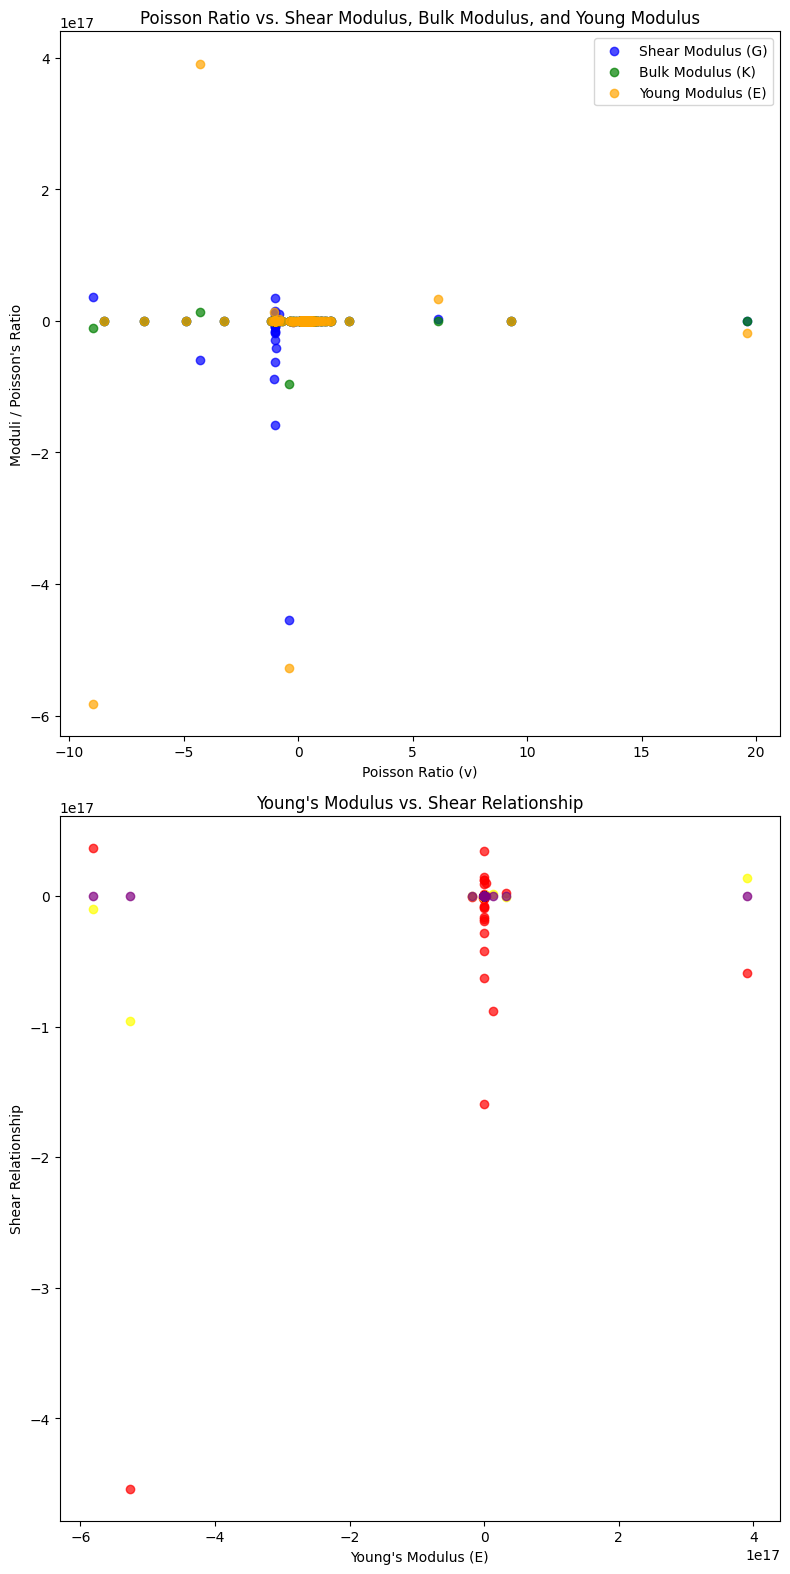

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# Extract columns correctly, ensuring not to exceed df's length
num_rows = min(2911, len(df))
bulk_modulus_lst = [df.iloc[n, 0] for n in range(num_rows)]
shear_modulus_lst = [df.iloc[n, 1] for n in range(num_rows)]
young_modulus_lst = [df.iloc[n, 2] for n in range(num_rows)]
poisson_ratio_lst = [df.iloc[n, 3] for n in range(num_rows)]
#shear_rela_lst = [df.iloc[n, 5] for n in range(num_rows)]

# Sort data for continuous line plot
#sorted_pairs = sorted(zip(young_modulus_lst, shear_rela_lst))
#young_sorted, shear_rela_sorted = zip(*sorted_pairs)

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(8, 16))  # 3 rows, 1 column

# 1. Combined Scatter Plot
ax[0].scatter(poisson_ratio_lst, shear_modulus_lst, color='blue', alpha=0.7, label="Shear Modulus (G)")
ax[0].scatter(poisson_ratio_lst, bulk_modulus_lst, color='green', alpha=0.7, label="Bulk Modulus (K)")
ax[0].scatter(poisson_ratio_lst, young_modulus_lst, color='orange', alpha=0.7, label="Young Modulus (E)")
ax[0].set_xlabel("Poisson Ratio (v)")
ax[0].set_ylabel("Moduli / Poisson's Ratio")
ax[0].set_title("Poisson Ratio vs. Shear Modulus, Bulk Modulus, and Young Modulus")
ax[0].legend()

# 2. Young’s Modulus vs. Shear Relationship (Sorted Line)

ax[1].scatter(young_modulus_lst, shear_modulus_lst, color='red', alpha=0.7, label="Shear Modulus (G)")
ax[1].scatter(young_modulus_lst, bulk_modulus_lst, color='yellow', alpha=0.7, label="Bulk Modulus (K)")
ax[1].scatter(young_modulus_lst, poisson_ratio_lst, color='purple', alpha=0.7, label="Poisson's Ratio (ν)")
ax[1].set_xlabel("Young's Modulus (E)")
ax[1].set_ylabel("Shear Relationship")
ax[1].set_title("Young's Modulus vs. Shear Relationship")


# 3. Bulk Modulus vs. Shear Relationship
"""
ax[2].scatter(bulk_modulus_lst, shear_rela_lst, color='purple', alpha=0.7)
ax[2].set_xlabel("Bulk Modulus (K)")
ax[2].set_ylabel("Shear Relationship")
ax[2].set_title("Bulk Modulus vs. Shear Relationship")
"""
# Adjust layout
plt.tight_layout()

plt.show()


In [11]:
new_bulk_lst = []
for i in bulk_modulus_lst:
    if 0 <= i <= 1000:
        new_bulk_lst.append(i)

new_shearmod_lst = []
for j in shear_modulus_lst:
    if 0 <= j <= 1000:
        new_shearmod_lst.append(j)

print(new_bulk_lst)


[138.1964947, 248.9404481, 329.5525604, 292.0417405, 221.3789909, 316.9493064, 293.334007, 241.8792896, 305.0348939, 311.1496999, 341.8005224, 144.8620398, 173.5330701, 241.2165423, 219.9084597, 283.9092745, 310.1552624, 207.8728853, 254.9691838, 339.6350976, 286.2359797, 264.2973874, 365.3640306, 264.0212623, 295.7077108, 269.3190965, 308.7006835, 78.59231172, 51.19929601, 143.4526802, 154.3896759, 62.19611139, 129.0035638, 59.39342965, 138.4894006, 154.6179136, 140.2263491, 242.8137425, 79.04231094, 83.17909472, 76.57408605, 223.4253665, 142.8665206, 173.829619, 181.0214786, 165.3012399, 183.3876087, 174.7276333, 184.1673105, 188.7440697, 175.916079, 190.776865, 169.8665496, 186.3697654, 195.3218364, 225.5827811, 198.4405084, 236.2388686, 299.8702523, 352.3769286, 326.1597972, 316.1835336, 211.6877176, 230.4488192, 163.8935569, 241.602469, 258.0722161, 286.0439122, 314.2052693, 145.2024633, 252.6318649, 184.9945916, 200.4960605, 207.1661112, 209.1849344, 298.3891309, 182.8856335, 203

In [12]:
import pandas as pd

# Prepare JDP list
JDP = [
    jarvis_data_lst[4],
    jarvis_data_lst[6],
    jarvis_data_lst[18],  # JDP[2]
    jarvis_data_lst[19],  # JDP[3]
    jarvis_data_lst[20],
    new_bulk_lst,
    new_shearmod_lst,
    material_data_df.iloc[:, 39],
    material_data_df.iloc[:, 40],
]

# Convert to DataFrame for vectorized computation
df_1 = pd.DataFrame({
    'val1': JDP[2],
    'val2': JDP[3],
    'val3': JDP[4]
})

df_1 = df_1.astype(float)

trace_data = (df_1['val1'] + df_1['val2'] + df_1['val3'])
JDP.append(trace_data)
print(JDP[4][1])

15.0516


In [13]:
#Only for the Shear relationship calculation
new_shear_lst = []
for i in shear_rela_lst:
    try:
        new_shear_lst.append(float(i))  # Convert valid numbers
    except ValueError:
        continue  # Skip invalid values like '#DIV/0!'

while len(new_shear_lst) < len(X):
    new_shear_lst.append(0)  # Append zeros to match X

X = np.column_stack((X, new_shear_lst))
print(X[:,3])


NameError: name 'shear_rela_lst' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
    
    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.max_iters):
            labels = self._assign_labels(X)
            new_centroids = self._update_centroids(X, labels)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
    
    def _assign_labels(self, X):
        # Calculate the distance from each point to every centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def _update_centroids(self, X, labels):
        # Update centroids by taking the mean of points in each cluster
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids



In [50]:
import numpy as np

# Find the minimum length
min_len = min(len(JDP[7]), len(JDP[1]), len(JDP[5]), len(JDP[6]), len(JDP[0]))

# Zip all feature lists and filter out rows with '#VALUE!' or other non-floats
clean_data = []
for i in range(min_len):
    try:
        row = [
            float(JDP[7][i]),
            float(JDP[1][i]),
            float(JDP[5][i]),
            float(JDP[6][i]),
            float(JDP[0][i]),
            float(JDP[8][i])
        ]
        clean_data.append(row)
    except ValueError:
        continue  # Skip rows with invalid values

# Convert to NumPy array
X = np.array(clean_data)

# Print the cleaned and stacked data
print(X[:,5])
print(JDP[8])


[ 0.11295348  0.13469011  0.19497271 ...  0.24358769  0.27336449
 -0.11549708]
0        0.112953483
1        0.134690108
2        0.194972714
3        0.389036017
4        0.391744548
            ...     
1396     0.252097902
1397     0.252271139
1398     0.243587688
1399     0.273364486
1400    -0.115497076
Name: Poisson's Ratio (v), Length: 1401, dtype: object


In [ ]:
!pip install seaborn

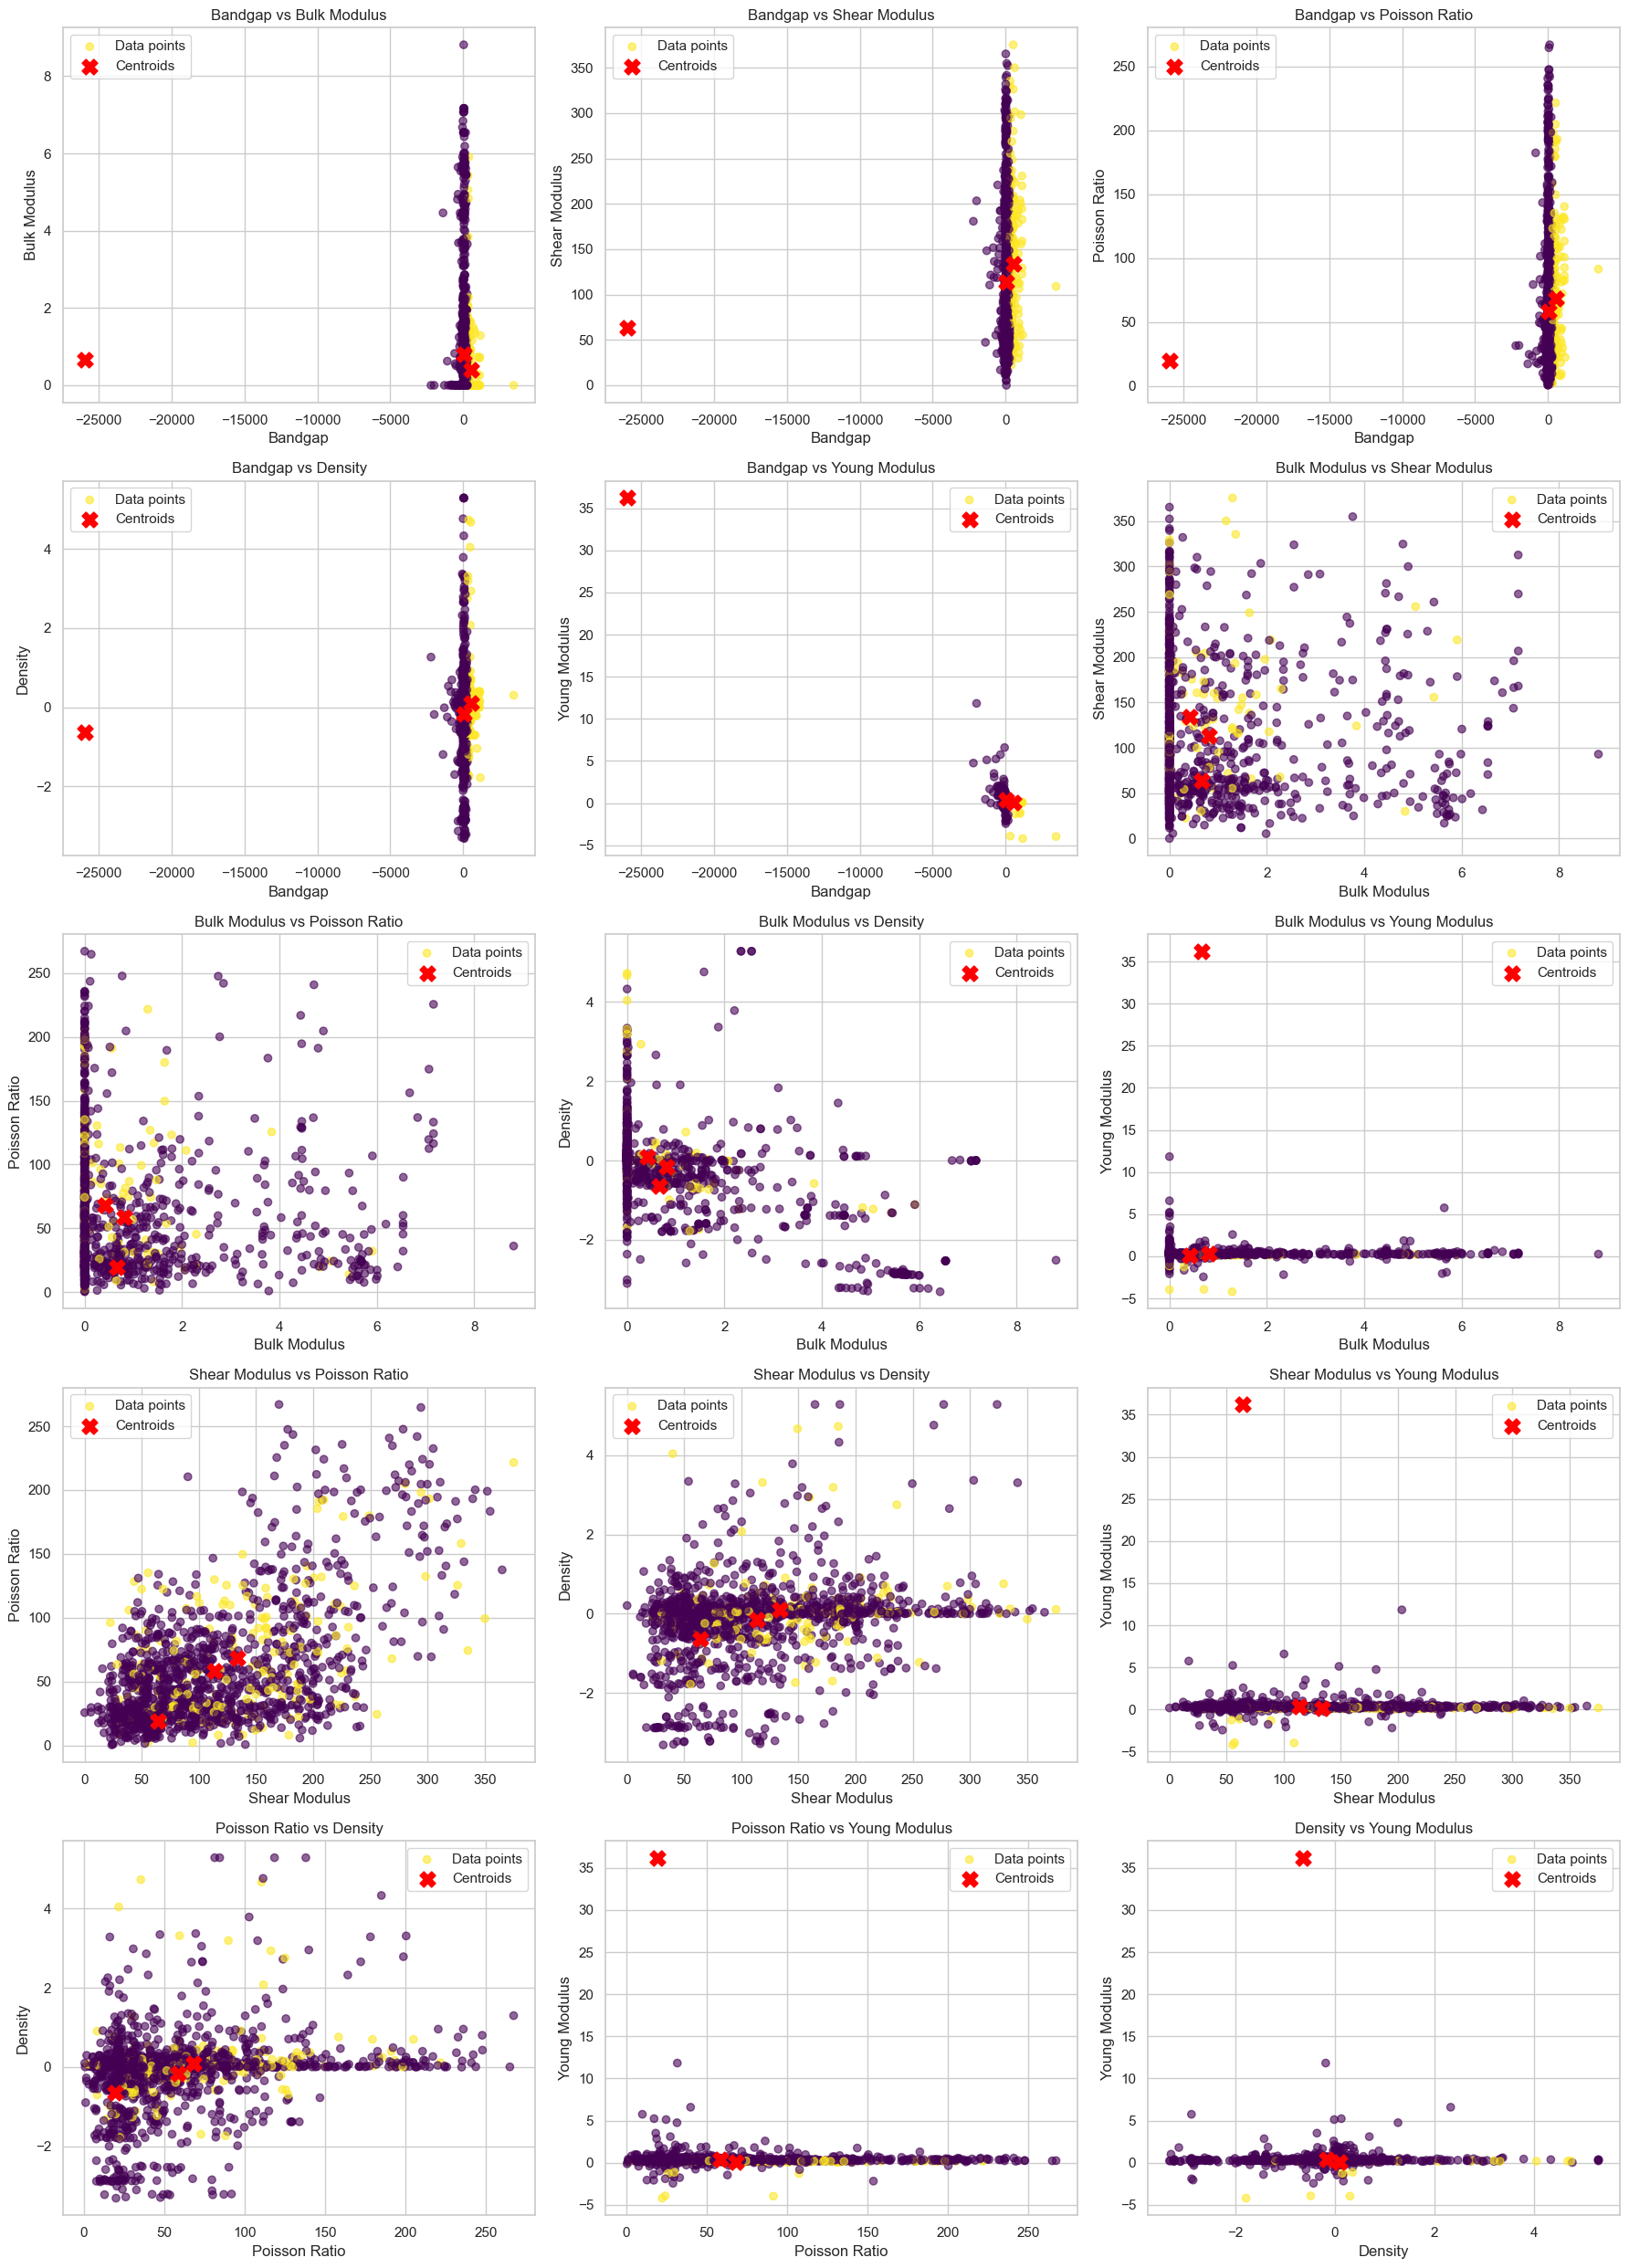

In [53]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import itertools

# Example: assume X has shape (n_samples, n_features)
# X = ... (your data here)

# Setup styling
sns.set(style="whitegrid")

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Define feature names (change according to your actual column meaning)
feature_names = ["Bandgap", "Bulk Modulus", "Shear Modulus", "Poisson Ratio", "Density", "Young Modulus"]

# Get all unique feature index pairs
pairs = list(itertools.combinations(range(X.shape[1]), 2))

# Create subplots with appropriate size
n_pairs = len(pairs)
n_cols = 3
n_rows = int(np.ceil(n_pairs / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()  # Flatten in case of 2D axes array

# Plot each pair
for idx, (i, j) in enumerate(pairs):
    ax = axes[idx]
    ax.scatter(X[:, i], X[:, j], c=labels, cmap='viridis', alpha=0.6, label="Data points")
    ax.scatter(centroids[:, i], centroids[:, j], c='red', marker='X', s=150, label="Centroids")
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel(feature_names[j])
    ax.set_title(f"{feature_names[i]} vs {feature_names[j]}")
    ax.legend()

# Remove unused subplots
for k in range(len(pairs), len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#Loading the Iris dataset
data = load_iris()
X, y = data.data, data.target

#Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating an XGBoost classifier
model = xgb.XGBClassifier()

#Training the model on the training data
model.fit(X_train, y_train)

#Making predictions on the test set
predictions = model.predict(X_test)

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=data.target_names))